# 데이터 호출

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import tensorflow as tf
import csv
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping
from tensorflow.python.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,Activation,Dropout,MaxPooling2D
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import Adam

In [23]:
#directory
train_dir='/content/drive/MyDrive/smile_datasets/train_folder'
test_dir='/content/drive/MyDrive/smile_datasets/test_folder'

train_1_dir=os.path.join(train_dir,'1')
train_0_dir=os.path.join(train_dir,'0')

test_1_dir=os.path.join(test_dir,'1')
test_0_dir=os.path.join(test_dir,'0')

In [24]:
def load_train(train_1_dir,train_0_dir):

    height=64
    width=64
    rows=[]
    y=[]
    
    # 이미지 개수 세기 위해 이미지 경로 rows에 저장
    for i in os.listdir(train_1_dir):
        rows.append(train_1_dir+'/'+i)
        y.append(1)

    for j in os.listdir(train_0_dir):
        rows.append(train_0_dir+'/'+j)
        y.append(0)

    imgs= np.empty((len(list(rows)),height,width,1),dtype=np.uint8)    # numpy.empty(shape, dtype=float, order='C', *, like=None)
    tgs=np.empty((len(list(rows)),1))
    # 이미지 로딩 및 전처리 후 img에 저장
    for row,i in zip(rows,range(len(rows))):
        img=load_img(row,target_size=(height,width),grayscale=True)
        im=np.array(img,dtype=np.uint8)
        im=np.expand_dims(im,axis=2)
        imgs[i]=im
    y=np.expand_dims(y,axis=1)
    
    return imgs , y

In [62]:
X_train,y_train=load_train(train_1_dir,train_0_dir)

X_val,y_val=load_train(test_1_dir,test_0_dir)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


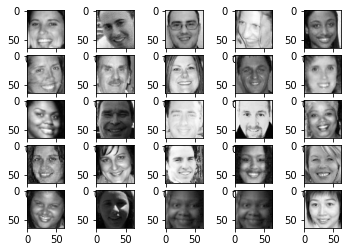

In [63]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i].reshape((64, 64)), cmap='gray')

# Data Augmentation

In [64]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,

)

datagen_val=ImageDataGenerator(rescale=1./255)

train_gen= datagen.flow(
    x=X_train, y=y_train,
    batch_size=32,
    shuffle=False
)

val_gen=datagen_val.flow(
    x=X_val,y=y_val,
    batch_size=32,
    shuffle=False
)

# Modeling

In [65]:
model=tf.keras.Sequential()
model.add(Conv2D(32,(3,3),padding='same',activation='relu',strides=1,input_shape = (64, 64, 1))
)
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),padding='same',activation='relu',strides=1))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),padding='same',activation='relu',strides=1))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [66]:
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0.01, patience = 20, mode = 'auto')

model.fit(train_gen,epochs=2000,validation_data=val_gen,callbacks = [early_stopping])

Epoch 1/50
86/86 [==============================] - 27s 309ms/step - loss: 0.7780 - accuracy: 0.4989 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/50
86/86 [==============================] - 26s 308ms/step - loss: 0.6930 - accuracy: 0.5448 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/50
86/86 [==============================] - 26s 305ms/step - loss: 0.6928 - accuracy: 0.5452 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 4/50
86/86 [==============================] - 26s 304ms/step - loss: 0.7084 - accuracy: 0.5448 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 5/50
86/86 [==============================] - 26s 304ms/step - loss: 0.6931 - accuracy: 0.5452 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/50
86/86 [==============================] - 26s 304ms/step - loss: 0.6918 - accuracy: 0.5452 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 7/50
86/86 [==============================] - 26s 304ms/step - loss: 0.6919 - accuracy: 0.5452 - val_loss: 0.6935 - val_accuracy: 0.5000

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0

test acc: 0.5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


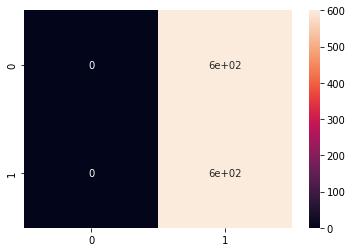

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

y_pred = model.predict(X_val/255.)
y_pred_logical = (y_pred > 0.5).astype(np.int)

print ('test acc: %s' % accuracy_score(y_val, y_pred_logical))
cm = confusion_matrix(y_val, y_pred_logical)
sns.heatmap(cm, annot=True)

In [69]:
model.save('smile_or_not.h5')